# Dfsu - Read

In [1]:
import mikeio

In [2]:
filename = "../tests/testdata/HD2D.dfsu"
ds = mikeio.read(filename)
ds

<mikeio.Dataset>
Geometry: Dfsu2D
Dimensions: (time:9, element:884)
Time: 1985-08-06 07:00:00 - 1985-08-07 03:00:00 (9 records)
Items:
  0:  Surface elevation <Surface Elevation> (meter)
  1:  U velocity <u velocity component> (meter per sec)
  2:  V velocity <v velocity component> (meter per sec)
  3:  Current speed <Current Speed> (meter per sec)

In [3]:
# to read specific variables
ds = mikeio.read(filename, items=["Surface elevation","Current speed"]) 
ds

<mikeio.Dataset>
Geometry: Dfsu2D
Dimensions: (time:9, element:884)
Time: 1985-08-06 07:00:00 - 1985-08-07 03:00:00 (9 records)
Items:
  0:  Surface elevation <Surface Elevation> (meter)
  1:  Current speed <Current Speed> (meter per sec)

In [4]:
ds.describe()

,Surface elevation,Current speed
count,7956.000000,7956.000000
mean,0.034152,0.073658
std,0.534890,0.119606
min,-0.758378,0.000082
25%,-0.579662,0.029917
50%,0.101636,0.046848
75%,0.462013,0.070259
max,1.172707,1.714988


Filter in space to the element at our POI, (discrete values, no interpolation)

In [5]:
ds.sel(x=606200, y=6905480)

<mikeio.Dataset>
Dimensions: (time:9)
Time: 1985-08-06 07:00:00 - 1985-08-07 03:00:00 (9 records)
Items:
  0:  Surface elevation <Surface Elevation> (meter)
  1:  Current speed <Current Speed> (meter per sec)

Interpolate in space to the location of our POI

In [6]:
ds.interp(x=606200, y=6905480)

<mikeio.Dataset>
Dimensions: (time:9)
Time: 1985-08-06 07:00:00 - 1985-08-07 03:00:00 (9 records)
Items:
  0:  Surface elevation <Surface Elevation> (meter)
  1:  Current speed <Current Speed> (meter per sec)

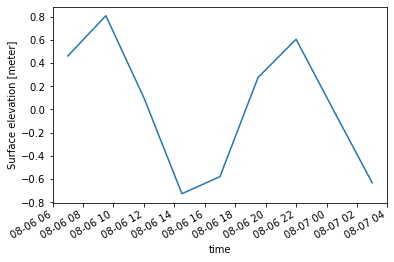

In [7]:
ds.interp(x=606200, y=6905480).Surface_elevation.plot();

Convert to a dataframe.

In [8]:
df = ds.sel(x=606200, y=6905480).to_dataframe()
df.head()

,Surface elevation,Current speed
1985-08-06 07:00:00,0.459460,0.009572
1985-08-06 09:30:00,0.806965,0.011064
1985-08-06 12:00:00,0.100285,0.017169
1985-08-06 14:30:00,-0.727009,0.014452
1985-08-06 17:00:00,-0.579541,0.007349


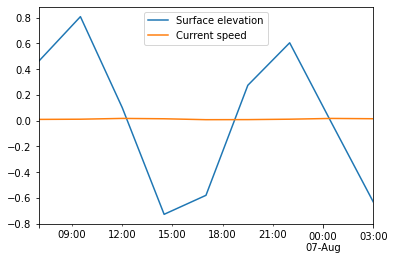

In [9]:
df.plot();

## Other ways to subset data 

Assume that we interested in these 3 points only

In [10]:
pt1 = (606200, 6905480)
pt2 = (606300, 6905410)
pt3 = (606400, 6905520)
pts_x = [pt1[0], pt2[0], pt3[0]]
pts_y = [pt1[1], pt2[1], pt3[1]]
elem_ids = ds.geometry.find_index(pts_x, pts_y)

We can use these element ids either when we select the data from the complete dataset using the method isel() as shown above or already when we read the data from file (particular useful for files larger than memory)

In [11]:
ds_pts = mikeio.read(filename, elements=elem_ids)
ds_pts

<mikeio.Dataset>
Geometry: Dfsu2D
Dimensions: (time:9, element:3)
Time: 1985-08-06 07:00:00 - 1985-08-07 03:00:00 (9 records)
Items:
  0:  Surface elevation <Surface Elevation> (meter)
  1:  U velocity <u velocity component> (meter per sec)
  2:  V velocity <v velocity component> (meter per sec)
  3:  Current speed <Current Speed> (meter per sec)

# Create a new dfsu file

* Subset of items
* Renamed variables

First inspect the source file:

In [12]:
ds = mikeio.read("../tests/testdata/HD2D.dfsu")
ds

<mikeio.Dataset>
Geometry: Dfsu2D
Dimensions: (time:9, element:884)
Time: 1985-08-06 07:00:00 - 1985-08-07 03:00:00 (9 records)
Items:
  0:  Surface elevation <Surface Elevation> (meter)
  1:  U velocity <u velocity component> (meter per sec)
  2:  V velocity <v velocity component> (meter per sec)
  3:  Current speed <Current Speed> (meter per sec)

In [13]:
outfilename2 = "HD2D_selected.dfsu"

newds = ds[["U velocity", "V velocity"]].rename({'U velocity': 'eastward_sea_water_velocity',
                                                 'V velocity': 'northward_sea_water_velocity'})
newds

<mikeio.Dataset>
Geometry: Dfsu2D
Dimensions: (time:9, element:884)
Time: 1985-08-06 07:00:00 - 1985-08-07 03:00:00 (9 records)
Items:
  0:  eastward_sea_water_velocity <u velocity component> (meter per sec)
  1:  northward_sea_water_velocity <v velocity component> (meter per sec)

In [14]:
newds.to_dfs(outfilename2)

Read the newly created file to verify the contents.

In [15]:
newds2 = mikeio.read(outfilename2)
newds2

<mikeio.Dataset>
Geometry: Dfsu2D
Dimensions: (time:9, element:884)
Time: 1985-08-06 07:00:00 - 1985-08-07 03:00:00 (9 records)
Items:
  0:  eastward_sea_water_velocity <u velocity component> (meter per sec)
  1:  northward_sea_water_velocity <v velocity component> (meter per sec)

# Write mesh from dfsu file
Don't you have the original mesh? No problem - you can re-create it from the dfsu file... 

In [16]:
outmesh = 'mesh_from_HD2D.mesh'
ds.geometry.to_mesh(outmesh)

# Clean up

In [17]:
import os
os.remove(outfilename2)
os.remove(outmesh)